In [ ]:
# Step 1: Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random


In [3]:
train_dir = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\train"
test_dir  = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\test"


In [ ]:
# Step 2: Load dataset function
def load_data(data_dir, limit=None, img_size=(32, 32)):
    X, y = [], []
    for folder, label in [("cats", 0), ("dogs", 1)]:
        folder_path = os.path.join(data_dir, folder)
        files = os.listdir(folder_path)[:limit]   # take 'limit' per class

        for file in files:
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)  # read color image (BGR)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
            img = cv2.resize(img, img_size).flatten() / 255.0
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [7]:
# Step 3: Load dataset
# -------------------------------
train_dir = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\train"
test_dir  = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\test"

x_train, y_train = load_data(train_dir, limit=1000)  # 1000 cats + 1000 dogs
x_test, y_test   = load_data(test_dir, limit=250)    # 250 cats + 250 dogs

print("Training samples:", x_train.shape, y_train.shape)
print("Testing samples:", x_test.shape, y_test.shape)
print("Cats in train:", np.sum(y_train==0))
print("Dogs in train:", np.sum(y_train==1))
print("Cats in test :", np.sum(y_test==0))
print("Dogs in test :", np.sum(y_test==1))

Training samples: (2000, 12288) (2000,)
Testing samples: (500, 12288) (500,)
Cats in train: 1000
Dogs in train: 1000
Cats in test : 250
Dogs in test : 250


In [8]:
# Step 4: Train SVM
# -------------------------------
print("\nTraining SVM...")
svm_model = SVC(kernel='rbf', gamma=0.001, C=10, random_state=42)
svm_model.fit(x_train, y_train)


Training SVM...


,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       250
           1       0.67      0.60      0.63       250

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



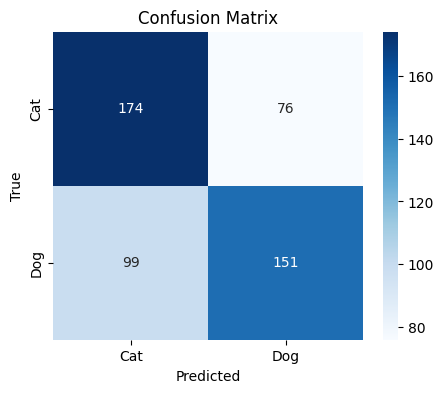

In [ ]:
# Step 5: Evaluate model
y_pred = svm_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

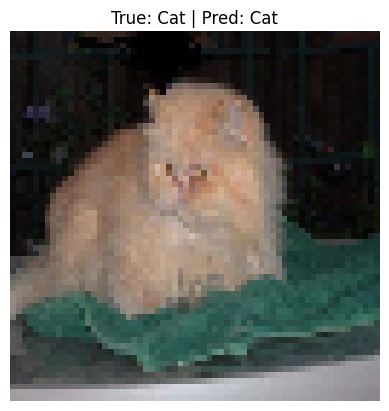

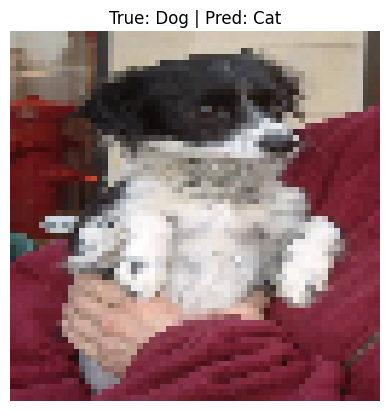

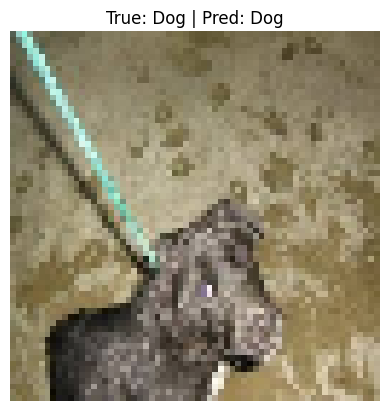

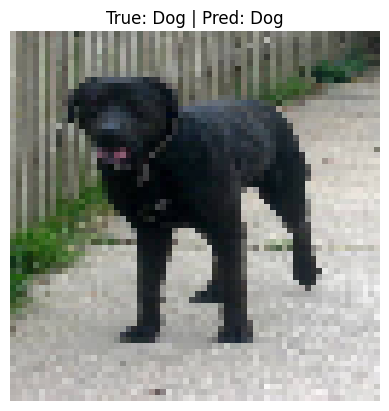

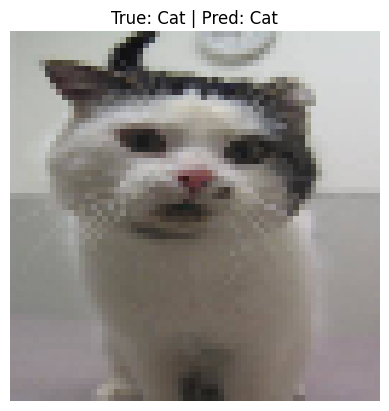

In [ ]:
# Step 6: Show 5 random predictions
def show_predictions(n=5):
    indices = random.sample(range(len(x_test)), n)
    for i in indices:
        img = x_test[i].reshape(64, 64, 3)  # reshape back to RGB
        true_label = "Cat" if y_test[i] == 0 else "Dog"
        pred_label = "Cat" if y_pred[i] == 0 else "Dog"

        plt.imshow(img)
        plt.title(f"True: {true_label} | Pred: {pred_label}")
        plt.axis("off")
        plt.show()

show_predictions(5)

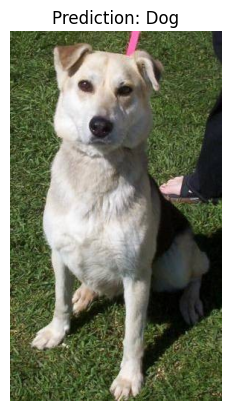

Model Prediction: Dog


In [ ]:

# Step 7: Predict custom image
def predict_and_show(img_path):
    # Read and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert to RGB
    img = cv2.resize(img, (64, 64)).flatten() / 255.0

    # Predict
    pred = svm_model.predict([img])[0]
    label = "Cat" if pred == 0 else "Dog"

    # Show the image with prediction
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.show()

    return label


# Example: test with your own image
img_path = r"C:\Users\prasa\Desktop\dog.90.jpg"   
print("Model Prediction:", predict_and_show(img_path))


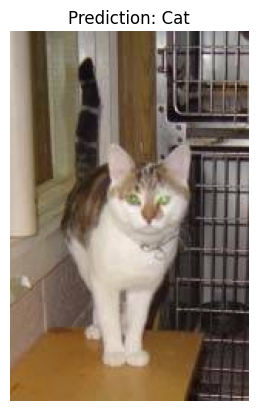

Model Prediction: Cat


In [ ]:
img_path = r"C:\Users\prasa\Desktop\cat.289.jpg"   
print("Model Prediction:", predict_and_show(img_path))
